In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.projections import projection_registry

import project_fitness_function as fit

In [2]:
file = 'train_data.csv'
terreno_hectares = 2
limite_agua = 8.5
janela_dias = 90
orcamento_maximo = 7.5

interacoes = 500

In [3]:
df = pd.read_csv(file)

In [4]:
m2_area = terreno_hectares * 10_000

In [5]:
melhor_resultado = []
fitness_history = []
std_fitness_history = []
best_fitness_so_far = []
avg_fitness_history = []
resultados = []

def adaptacao(amostras):
    for i, amostra in enumerate(amostras):
        fit_result = fit.project_fitness_function(amostra, orcamento_maximo, m2_area, limite_agua, janela_dias)
        resultados.append({'sample': amostra, 'fitness': fit_result})

    resultados.sort(key=lambda x: x['fitness'],reverse=True)

    fitness_values = [item['fitness'] for item in resultados]
    std_fitness = np.std(fitness_values)
    # Adiciona à lista de desvios padrão
    std_fitness_history.append(std_fitness)
    avg_fitness = sum(item['fitness'] for item in resultados) / len(resultados)
    avg_fitness_history.append(avg_fitness)


    fitness_history.append(resultados[0]['fitness'])

    if len(melhor_resultado) == 0:
        melhor_resultado.append(resultados[0])

    if resultados[0]['fitness'] > melhor_resultado[0]['fitness']:
        melhor_resultado[0] = resultados[0]

    best_fitness_so_far.append(melhor_resultado[0]['fitness'])


# array que contém população inicial
populacaoo_inicial = []

# gera 100 amostras e preenche a população inicial
for i in range(100):
    populacaoo_inicial.append(df.sample(5))

# executa para população inicial
adaptacao(populacaoo_inicial)

samples_50 = [item['sample'] for item in resultados[:2]]
best_df = pd.concat(samples_50, ignore_index=True).drop_duplicates()

#crossover de genes para a quantidade de interações configuradas
for i in range(interacoes):
    nova_populacao = fit.crossover(populacaoo_inicial, best_df)
    adaptacao(nova_populacao)
    print(melhor_resultado[0]['fitness'])
    samples_50 = [item['sample'] for item in resultados[:2]]
    best_df = pd.concat(samples_50, ignore_index=True).drop_duplicates()

print(melhor_resultado[0]['fitness'])

303.656045
327.9634039232876
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
442.7902578951369
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
464.2069569419765
520.3010234113502
520.3010234113502
520.3010234113502

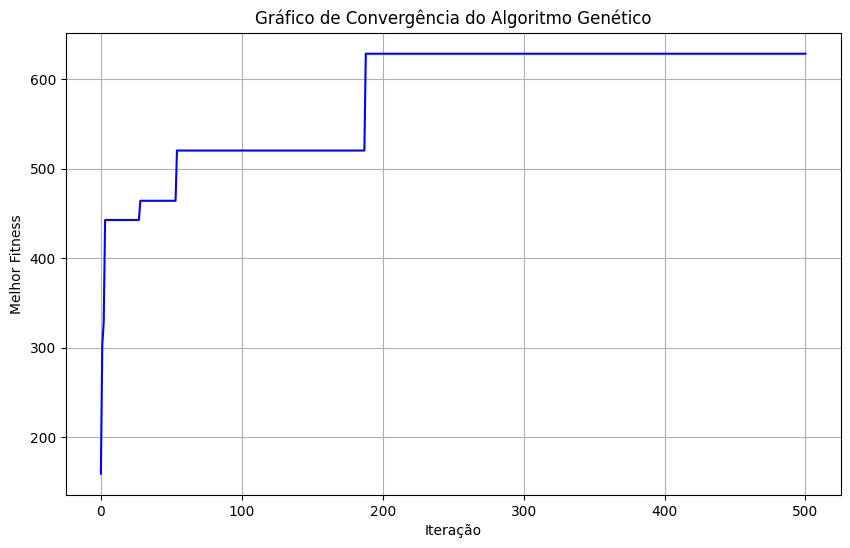

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(fitness_history)), fitness_history, linestyle='-', color='b')
plt.title('Gráfico de Convergência do Algoritmo Genético')
plt.xlabel('Iteração')
plt.ylabel('Melhor Fitness')
plt.grid(True)
plt.show()

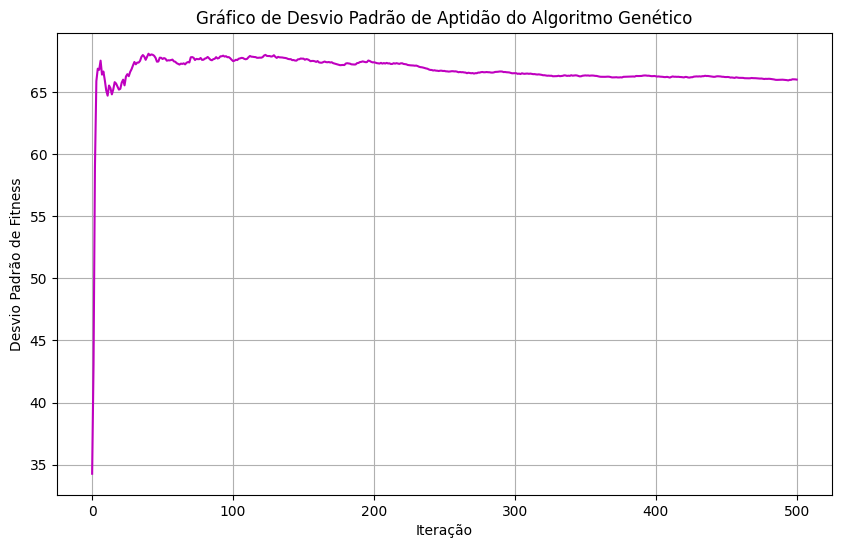

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(std_fitness_history)), std_fitness_history, linestyle='-', color='m')
plt.title('Gráfico de Desvio Padrão de Aptidão do Algoritmo Genético')
plt.xlabel('Iteração')
plt.ylabel('Desvio Padrão de Fitness')
plt.grid(True)
plt.show()

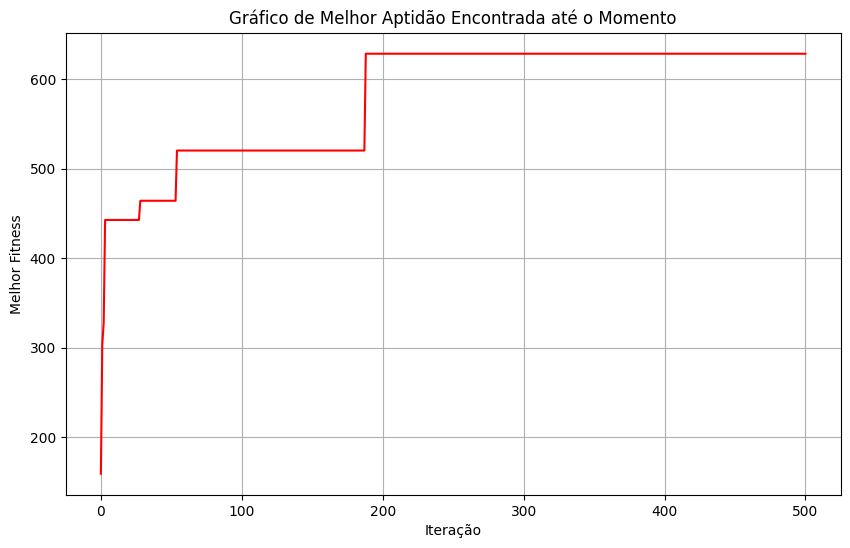

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(best_fitness_so_far)), best_fitness_so_far, linestyle='-', color='r')
plt.title('Gráfico de Melhor Aptidão Encontrada até o Momento')
plt.xlabel('Iteração')
plt.ylabel('Melhor Fitness')
plt.grid(True)
plt.show()

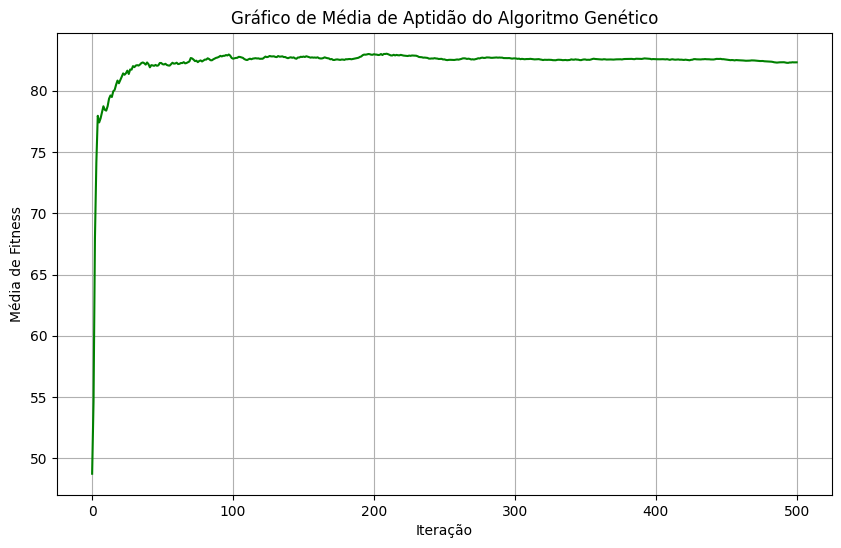

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(avg_fitness_history)), avg_fitness_history, linestyle='-', color='g')
plt.title('Gráfico de Média de Aptidão do Algoritmo Genético')
plt.xlabel('Iteração')
plt.ylabel('Média de Fitness')
plt.grid(True)
plt.show()